### Objective : In this notebook we will play around with the spotify datasets and do the following things
                
    1. Do EDA on data to understand the size of the data
    2. To reduce memory usage take each distinct Song and give it a numeric value 
    3. Convert each playlist of the user into sequential data by randomly grouping them based playlist name
    4. Hypothesis is simple that each song inplaylist can be played randomly

#### Spotify playlists dataset


This dataset is based on the subset of users in the #nowplaying dataset who publish their #nowplaying tweets via Spotify. In principle, the dataset holds users, their playlists and the tracks contained in these playlists. 

The csv-file holding the dataset contains the following columns: 
"user_id", "artistname", "trackname", "playlistname"
, where
- user_id is a hash of the user's Spotify user name
- artistname is the name of the artist
- trackname is the title of the track and
- playlistname is the name of the playlist that contains this track.

The separator used is , each entry is enclosed by double quotes and the escape character used is \.



A description of the generation of the dataset and the dataset itself can be found in the following paper:

Pichl, Martin; Zangerle, Eva; Specht, Günther: "Towards a Context-Aware Music Recommendation Approach: What is Hidden in the Playlist Name?" in 15th IEEE International Conference on Data Mining Workshops (ICDM 2015), pp. 1360-1365, IEEE, Atlantic City, 2015.

In [1]:
### Load the required packages in the required format
import pandas as pd
import os
import warnings

%matplotlib notebook
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
plt.style.use('ggplot')
import warnings
warnings.filterwarnings("ignore")

In [2]:
### Read the datasets from the given locations and do following
path = "C:\\Users\\ash\\Desktop\\NLP-DL\\Spotify_Playlist_Creation_Using_Word2vec\\spotify_playlists"
filename = "spotify_dataset.csv"
### While Loading datasets we say error_bad_lines = false which drops rows with errors 
### As it is experimental project and we have huge datasets, dropping 100-200 Bad rows will not impact any results
print ("Reading the data")
spotify_data = pd.read_csv(os.path.join(path,filename),escapechar= '.',error_bad_lines = False,warn_bad_lines=False)
print ("Read Succesful with shape {}".format(spotify_data.shape))
### Columns names were not very clean give them manual names
spotify_data.columns = ['user_id','artistname','trackname','playlistname']

Reading the data
Read Succesful with shape (12774191, 4)


### Lets look at the few stats about the data

In [3]:
print ("Some General statistics about data are as follows:",spotify_data.info())
print ("Lets look at the summary stats about the data :",spotify_data.describe(include ='object'))
print ("The number of rows in the datasets are as follows :",spotify_data.shape[0])
print (" The columns in the data are as follows :",spotify_data.columns)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12774191 entries, 0 to 12774190
Data columns (total 4 columns):
user_id         object
artistname      object
trackname       object
playlistname    object
dtypes: object(4)
memory usage: 389.8+ MB
Some General statistics about data are as follows: None
Lets look at the summary stats about the data :                                  user_id artistname trackname playlistname
count                           12774191   12741100  12774090     12634598
unique                             15897     303027   2057995       155522
top     4398de6902abde3351347b048fcdc287  Daft Punk   Starred      Starred
freq                              295274      35805     11159      1320739
The number of rows in the datasets are as follows : 12774191
 The columns in the data are as follows : Index(['user_id', 'artistname', 'trackname', 'playlistname'], dtype='object')


<IPython.core.display.Javascript object>


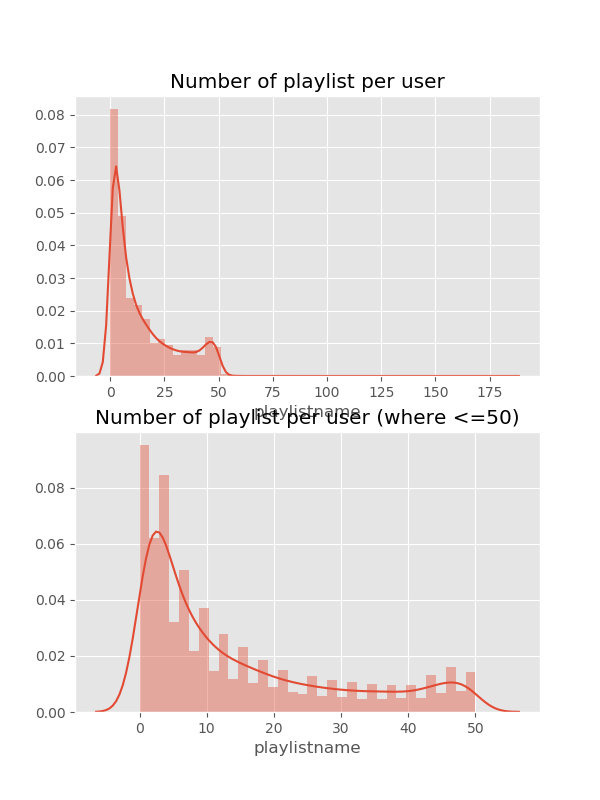

In [5]:
### Lets first look at the distribution of number of playlist by user_id
spotify_user_summary = spotify_data.groupby(['user_id'])["playlistname"].nunique().reset_index()
### Just for better visualisation remove very high playlist
fig, ax = plt.subplots(2, figsize=(6,8))
sns.distplot(spotify_user_summary['playlistname'], hist=True,ax = ax[0])
ax[0].set_title("Number of playlist per user")
spotify_user_summary = spotify_user_summary[spotify_user_summary['playlistname'] <= 50]
sns.distplot(spotify_user_summary['playlistname'], hist=True,ax=ax[1])
ax[1].set_title("Number of playlist per user (where <=50)")
plt.show()

### Insight 1 
###### Above Plot shows that data is skewed toward smaller number of playlist. Which makes logical sense.
###### Also We see a few users which may have very high number of playlists

<IPython.core.display.Javascript object>


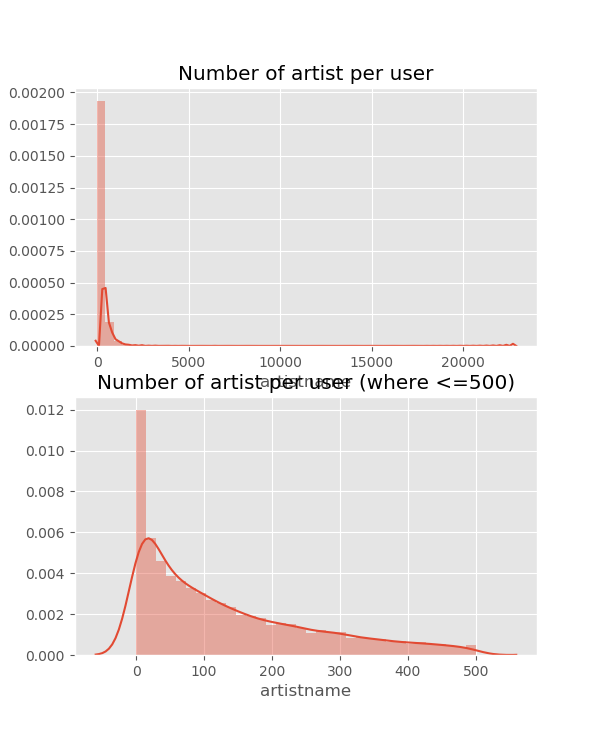

In [6]:
### Lets first look at the distribution of number of playlist by user_id
spotify_user_summary = spotify_data.groupby(['user_id'])["artistname"].nunique().reset_index()

### Just for better visualisation remove very high playlist
fig, ax = plt.subplots(2, figsize=(6,8))
sns.distplot(spotify_user_summary["artistname"], hist=True,ax = ax[0])
ax[0].set_title("Number of artist per user")
spotify_user_summary = spotify_user_summary[spotify_user_summary["artistname"] <= 500]
sns.distplot(spotify_user_summary["artistname"], hist=True,ax=ax[1])
ax[1].set_title("Number of artist per user (where <=500)")
plt.show()

In [39]:
### Insight 2
###### Most of the users listen to less number of artist as compared higher number of artist
###### Also We see a few users which may have very high number of playlists 

<IPython.core.display.Javascript object>


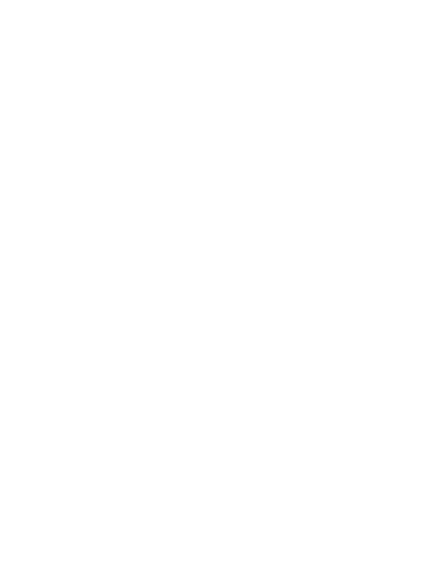

<IPython.core.display.Javascript object>


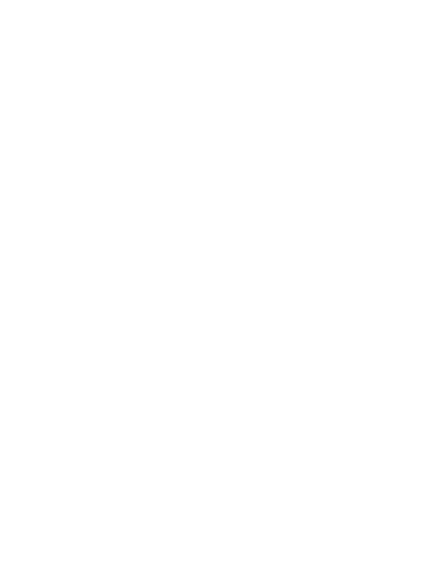

In [40]:
### Lets first look at the distribution of number of playlist by user_id
spotify_user_summary = spotify_data.groupby(['user_id'])["trackname"].nunique().reset_index()

### Just for better visualisation remove very high playlist
fig, ax = plt.subplots(2, figsize=(6,8))
sns.distplot(spotify_user_summary["trackname"], hist=True,ax = ax[0])
ax[0].set_title("Number of tracks per user")
spotify_user_summary = spotify_user_summary[spotify_user_summary["trackname"] <= 500]
sns.distplot(spotify_user_summary["trackname"], hist=True,ax=ax[1])
ax[1].set_title("Number of tracks per user (where <=500)")
plt.show()

<IPython.core.display.Javascript object>


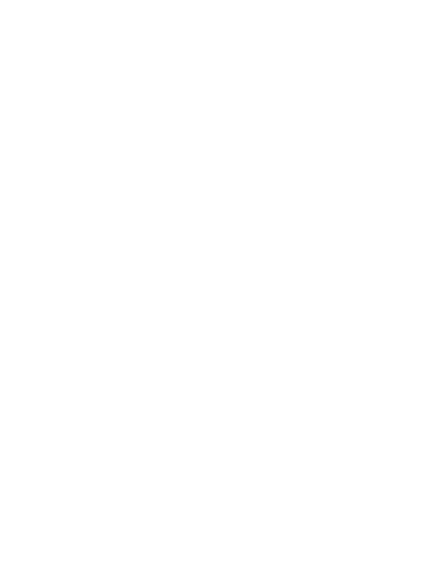

<IPython.core.display.Javascript object>


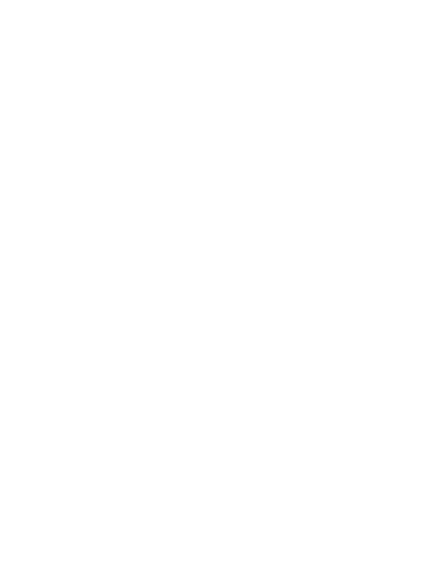

In [41]:
### Lets first look at the distribution of number of playlist by user_id
spotify_user_summary = spotify_data.groupby(['user_id'])["trackname","artistname"].nunique().reset_index()
spotify_user_summary = spotify_user_summary[spotify_user_summary['artistname']>0]

spotify_user_summary['Track_to_artist_ratio'] = spotify_user_summary['trackname'] / spotify_user_summary['artistname']
spotify_user_summary.dropna(inplace = True)
spotify_user_summary['Track_to_artist_ratio'] = spotify_user_summary['Track_to_artist_ratio'].astype(int)

### Just for better visualisation remove very high playlist
fig, ax = plt.subplots(2, figsize=(6,8))
sns.distplot(spotify_user_summary["Track_to_artist_ratio"], hist=True,ax = ax[0])
ax[0].set_title("AVerage tracks per artist")
spotify_user_summary = spotify_user_summary[spotify_user_summary["Track_to_artist_ratio"] <= 40]
sns.distplot(spotify_user_summary["Track_to_artist_ratio"], hist=True,ax=ax[1])
ax[1].set_title("Number of tracks per artist (where <=40)")
plt.show()

### Insight 3 
##### Majority of customers at an average listen a few songs from different artists
##### But we do have custmers who listen song a lot of songs from artists

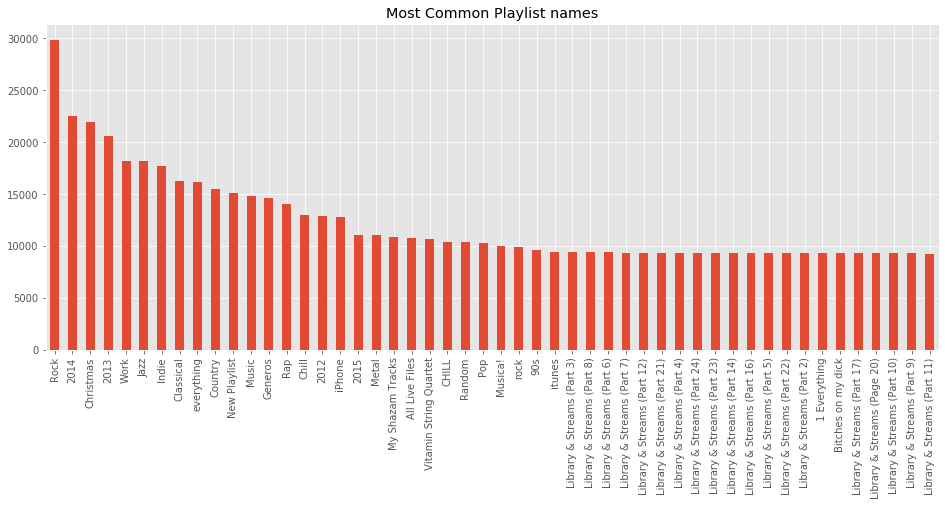

In [42]:
%matplotlib inline
### Lets have a look at most common playlist
## We could have aslo created a word cloud
spotify_data['playlistname'].value_counts()[3:53].plot(kind= 'bar',title="Most Common Playlist names",figsize = (16,6))

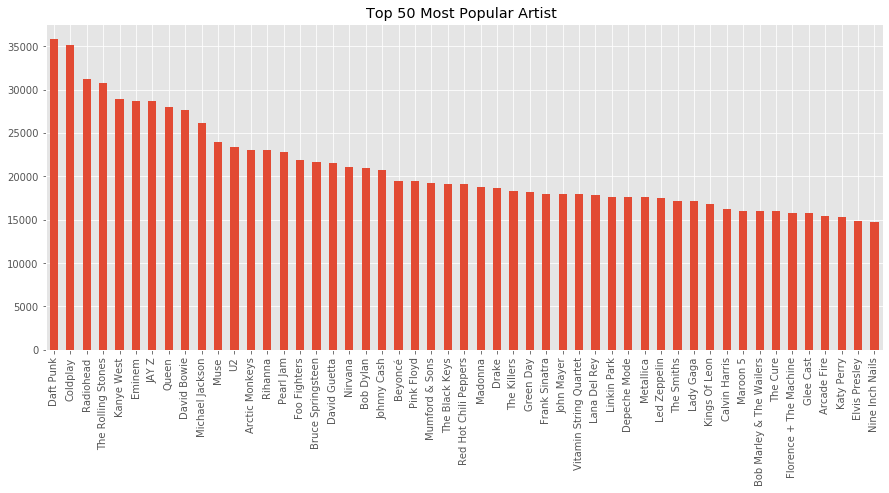

In [43]:
%matplotlib inline
### Lets have a look at most common playlist
## We could have aslo created a word cloud
spotify_data['artistname'].value_counts()[0:51].plot(kind= 'bar',title="Top 50 Most Popular Artist ",figsize = (15,6))

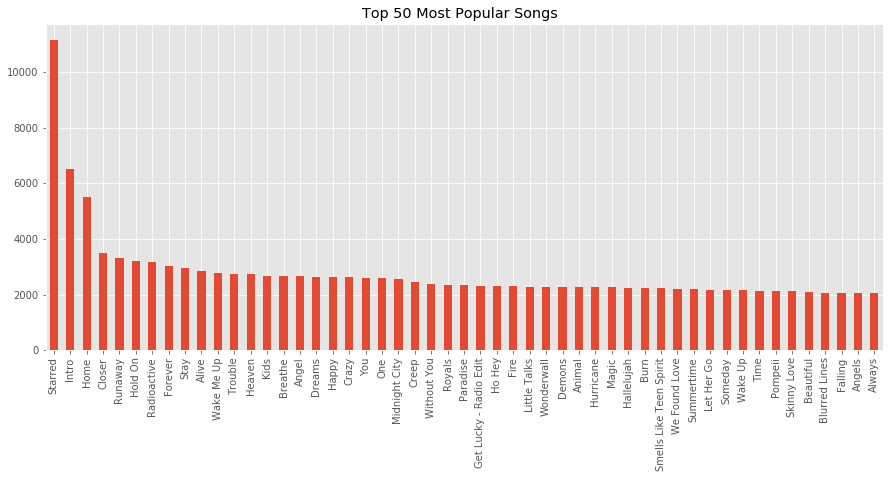

In [44]:
%matplotlib inline
### Lets have a look at most common playlist
## We could have aslo created a word cloud
spotify_data['trackname'].value_counts()[0:51].plot(kind= 'bar',title="Top 50 Most Popular Songs  ",figsize = (15,6))

In [45]:
### Now lets define function which creates a dictionary and convert songs names to dictionary

tracklist = spotify_data['trackname'].unique()

In [46]:
spotify_data.dropna(inplace = True)

In [47]:
### Create a function which takes a dataset name and column name 

def create_dict(dataset, column):
    ''' Takes two input from user column name and dataset name and return dictionary with hash map '''
    unique_list = dataset[column].unique()
    out_dict = {}
    out_dict1 = {}
    
    for j,i in enumerate(unique_list):
        out_dict[i.lower()] = str(j)
        out_dict1[str(j)] = i.lower()
        
    print ("Number of distinct in vocab is :",j)
    return (out_dict,out_dict1)

In [48]:
### call the dict functions on track names and artistname
track_map, track_map_comp= create_dict(spotify_data,'trackname')
artist_map,artist_map_comp = create_dict(spotify_data,'artistname')

Number of distinct in vocab is : 1978499
Number of distinct in vocab is : 285596


### We created two dicts as will first need to convert songs to numeric mapping and after we have trained the model we will return numeric to song mapping

In [49]:
with open('track_map_dict.pickle','wb') as track_file:
    pickle.dump(track_map,track_file)
with open('track_map_comp_dict.pickle','wb') as track_file_comp:
    pickle.dump(track_map_comp,track_file_comp)

In [50]:
with open('artist_map_dict.pickle','wb') as artist_file:
    pickle.dump(artist_map,artist_file)
with open('artist_map_comp_dict.pickle','wb') as artist_file_comp:
    pickle.dump(artist_map_comp,artist_file_comp)

### Data Processing For Word2vec models 
##### 1. Convert each artist name & song name to numeric using the dictionary first
##### 2. Roll up the data at User_id and Playlist level, and store songss in a playlist as list. Before doing that we will like to shuffle the datasets
##### 3. Train a word 2 vector model, and see how it works 

In [51]:
### Lets shuffle the data first
print ("Shape of data before sampling is:", spotify_data.shape)
spotify_data.sample(frac = 1,  random_state = 10000).reset_index(drop=True)
print ("Shape of data after sampling is :", spotify_data.shape)

Shape of data before sampling is: (12601573, 4)
Shape of data after sampling is : (12601573, 4)


In [52]:
### Load the pickle files stored for song to numeric 
with open('track_map_dict.pickle','rb') as dict1:
    track_dict= pickle.load( dict1)
print ("Track dict has {} observations".format(len(track_dict)))
#### Load the prcikle file for artist to numeric
with open('artist_map_dict.pickle','rb') as dict2:
    artist_dict = pickle.load(dict2)
print ("Track dict has {} observations".format(len(artist_dict)))

Track dict has 1866246 observations
Track dict has 278139 observations


In [54]:
### Now we will use this mapping to convert names to numeric
print ("Data before mapping dict :", spotify_data.head(5))
spotify_data['trackname'] = spotify_data['trackname'].str.lower().map(track_dict)
spotify_data['artistname'] = spotify_data['artistname'].str.lower().map(artist_dict)
print ("Data after mapping dict :")
print (spotify_data.head(5))

Data before mapping dict :                             user_id                        artistname  \
0  9cc0cfd4d7d7885102480dd99e7a90d6                    Elvis Costello   
1  9cc0cfd4d7d7885102480dd99e7a90d6  Elvis Costello & The Attractions   
2  9cc0cfd4d7d7885102480dd99e7a90d6                      Tiffany Page   
3  9cc0cfd4d7d7885102480dd99e7a90d6  Elvis Costello & The Attractions   
4  9cc0cfd4d7d7885102480dd99e7a90d6                    Elvis Costello   

                                           trackname    playlistname  
0               (The Angels Wanna Wear My) Red Shoes  HARD ROCK 2010  
1  (What's So Funny 'Bout) Peace, Love And Unders...  HARD ROCK 2010  
2                                   7 Years Too Late  HARD ROCK 2010  
3                              Accidents Will Happen  HARD ROCK 2010  
4                                             Alison  HARD ROCK 2010  
Data after mapping dict :
                            user_id artistname trackname    playlistname
0  9cc0cf

In [55]:
### We want to create a list of songs in zip file 
def zip_list(x):
    return ([str(z) for z in x])

#### Lets group by data based on the user id and playlist and zip it as a list

In [56]:
spotify_summary = spotify_data.groupby(['user_id','playlistname'])['trackname'].apply(zip_list).reset_index()

In [57]:
print (" Distinct playlist after summarizing the data is :",spotify_summary.shape[0])
print (" The data looks like this :")
print (spotify_summary.head(5))

 Distinct playlist after summarizing the data is : 229180
 The data looks like this :
                            user_id      playlistname  \
0  00055176fea33f6e027cd3302289378b              favs   
1  0007f3dd09c91198371454c608d47f22              2014   
2  0007f3dd09c91198371454c608d47f22         Fav songs   
3  0007f3dd09c91198371454c608d47f22         Sad songs   
4  000b0f32b5739f052b9d40fcc5c41079  Agnetha Fältskog   

                                           trackname  
0  [9619, 2591, 46683, 9620, 1138379, 37346, 6335...  
1                [174985, 1541, 878603, 17550, 5303]  
2  [1854415, 174985, 1684382, 955407, 19605, 1482...  
3                                 [1510871, 1448429]  
4                                  [1281658, 487582]  


In [ ]:
### We will Dump this data in the pickle file and work in it later
with open("spotify_summary.pickle",'wb') as pick_data:
    pickle.dump(spotify_summary,pick_data)
    print ("The dataset is pickled at ",os.getcwd())